In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd
%matplotlib inline

In [79]:
higher_definition_file="C:FILEPATH.geojson"
hd_states = gpd.read_file(higher_definition_file)

In [91]:
France_hd=hd_states[hd_states['CNTR_CODE']=='FR'] #select France
France_mainland=France_hd[~France_hd['NUTS_ID'].str.startswith('FRY')] #'FRY' contains all départements that are overseas

Text(0.5, 1, 'France')

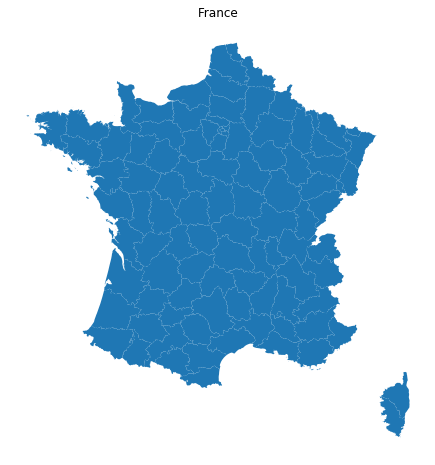

In [94]:
p=France_mainland.plot(figsize=(10,8))
p.axis('off')
p.set_title('France')

In [146]:
#West France (dairy farms)
NUTS_501=['Mayenne', 'Loire-Atlantique', 'Maine-et-Loire', 'Vendée', 'Sarthe']
NUTS_502=['Côtes-d’Armor', 'Morbihan', 'Ille-et-Vilaine', 'Finistère']
NUTS_503=['Deux-Sèvres', 'Charente', 'Vienne', 'Charente-Maritime']
NUTS_5=NUTS_501+NUTS_502+NUTS_503
West_France=France_mainland[France_mainland['NUTS_ID'].isin(NUTS_5)]

#South-West France (cattle farms)
NUTS_601=['Dordogne', 'Gironde', 'Landes','Lot-et-Garonne','Pyrénées-Atlantiques']
NUTS_602=['Ariège','Aveyron','Haute-Garonne','Gers','Lot','Hautes-Pyrénées','Tarn','Tarn-et-Garonne']
NUTS_603=['Corrèze','Creuse','Haute-Vienne']
NUTS_6=NUTS_601+NUTS_602+NUTS_603
South_West_France=France_mainland[France_mainland['NUTS_NAME'].isin(NUTS_6)]

#Central France (crop farms)
NUTS_201=['Ardennes','Aube','Marne','Haute-Marne']
NUTS_202=['Aisne','Oise','Somme']
NUTS_203=['Eure','Seine-Maritime']
NUTS_204=['Cher','Eure-et-Loir','Indre','Indre-et-Loire','Loir-et-Cher','Loiret']
NUTS_205=['Calvados','Manche','Orne']
NUTS_206=['Côte-d’Or','Nièvre','Saône-et-Loire','Yonne']
NUTS_2=NUTS_201+NUTS_202+NUTS_203+NUTS_204+NUTS_205+NUTS_206
Central_France=France_mainland[France_mainland['NUTS_NAME'].isin(NUTS_2)]

Text(0.5, 1, 'West France')

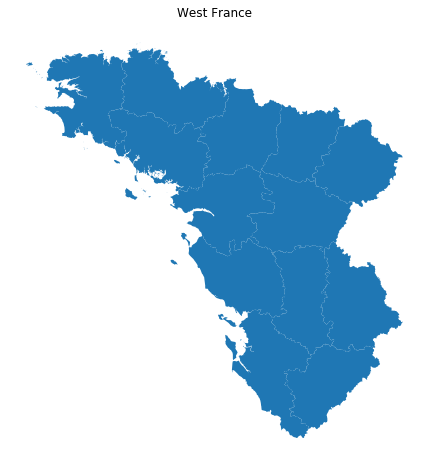

In [143]:
p=West_France.plot(figsize=(10,8))
p.axis('off')
p.set_title('West France')

Text(0.5, 1, 'South West France')

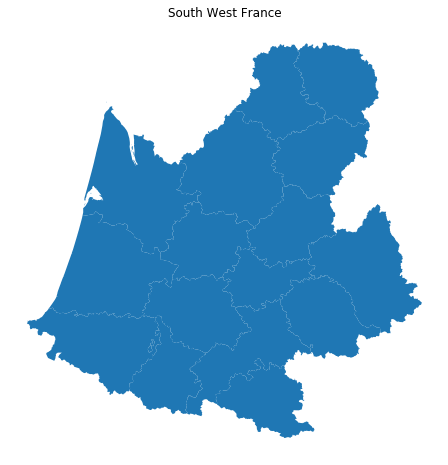

In [145]:
p=South_West_France.plot(figsize=(10,8))
p.axis('off')
p.set_title('South West France')

Text(0.5, 1, 'Central France')

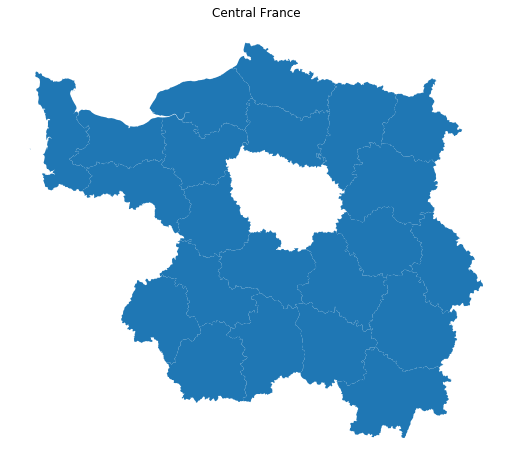

In [148]:
p=Central_France.plot(figsize=(10,8))
p.axis('off')
p.set_title('Central France')

In [110]:
def mark_region(ID, region):
    if ID in list(region['id']):
        return 1
    else:
        return 0

In [111]:
France_mainland['dairy_sample1']=France_mainland.apply(lambda x: mark_region(x.id, West_France), axis=1)

C:\Users\Josef\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [149]:
France_mainland['cattle_sample1']=France_mainland.apply(lambda x: mark_region(x.id, South_West_France), axis=1)
France_mainland['crops_sample1']=France_mainland.apply(lambda x: mark_region(x.id, Central_France), axis=1)

C:\Users\Josef\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Josef\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0.5, 1, 'West France (Dairy)')

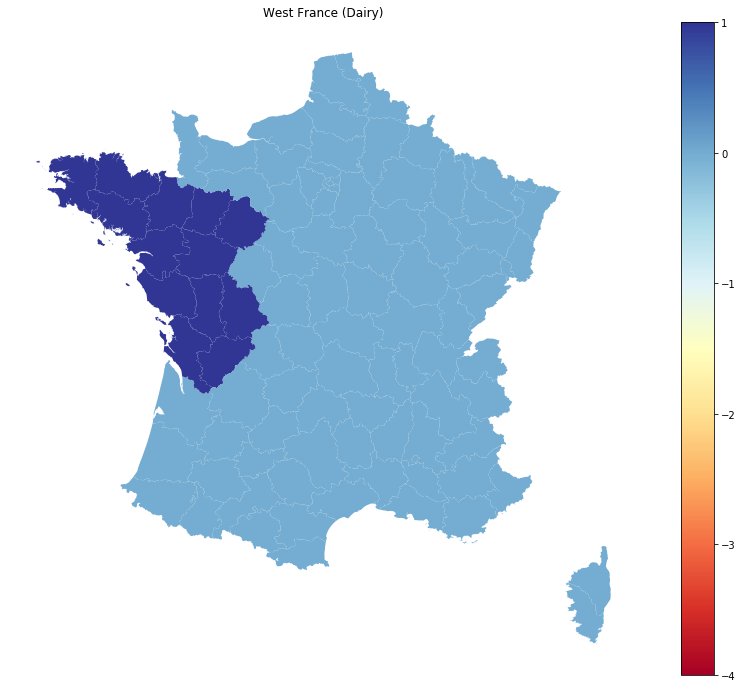

In [176]:
selected_region='dairy'
p=France_mainland.plot(column=f'{selected_region}_sample1', figsize=(15,12), legend=True,cmap='RdYlBu',vmin=-4)
p.axis('off')
#p.set_title(f'{selected_region} region')
p.set_title('West France (Dairy)')

Text(0.5, 1, 'cattle region')

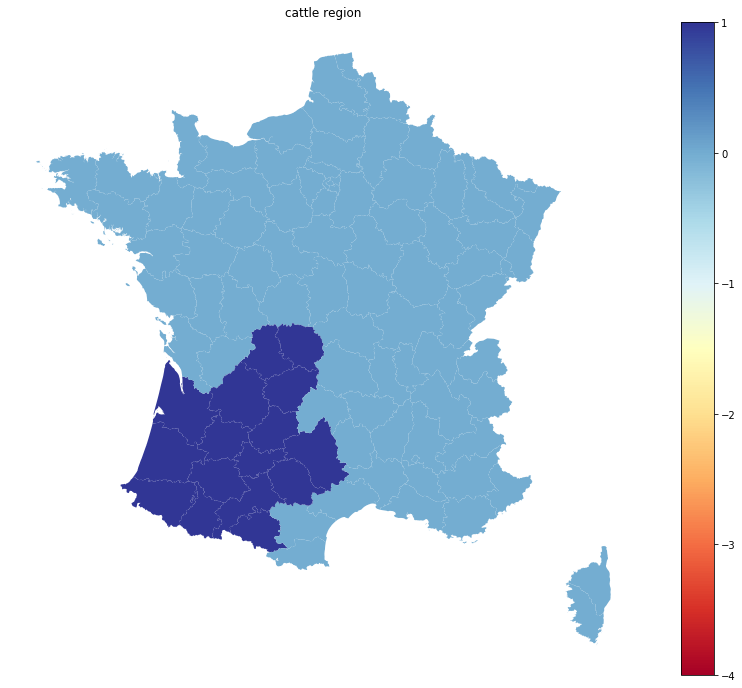

In [151]:
selected_region='cattle'
p=France_mainland.plot(column=f'{selected_region}_sample1', figsize=(15,12), legend=True,cmap='RdYlBu',vmin=-4)
p.axis('off')
p.set_title(f'{selected_region} region')


Text(0.5, 1, 'crops region')

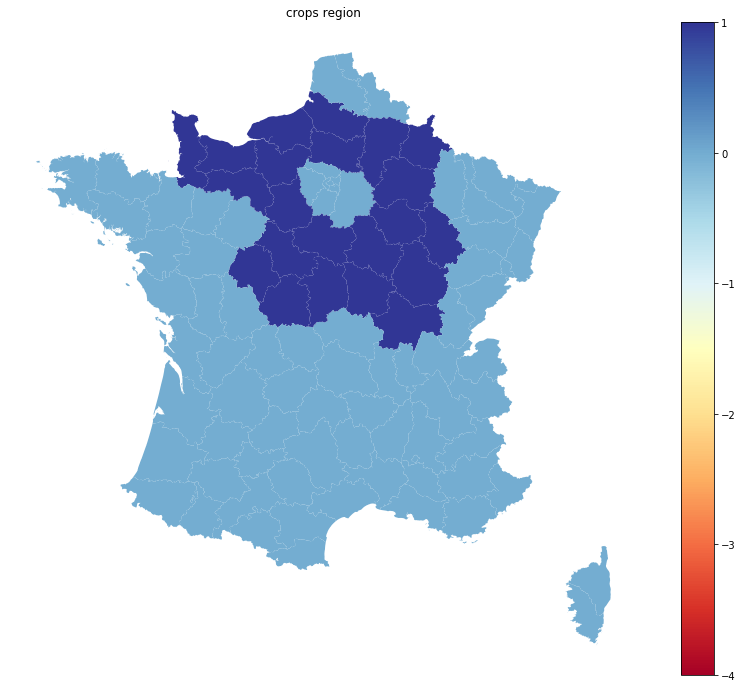

In [152]:
selected_region='crops'
p=France_mainland.plot(column=f'{selected_region}_sample1', figsize=(15,12), legend=True,cmap='RdYlBu',vmin=-4)
p.axis('off')
p.set_title(f'{selected_region} region')


### show it all in one

In [171]:
#drop the column that specifies the region, if already defined, before setting new colors
try:
    France_mainland.drop(columns='any_selected_region', inplace=True)
except:
    pass
    
color_id={'dairy':1,'cattle':-3.5, 'crops':-2.5}   #set a color on the colorbar from +1 to -4
def mark_all_regions(dairy, cattle, crops):
    if dairy==1:
        return color_id['dairy']
    elif cattle==1:
        return color_id['cattle']
    elif crops==1:
        return color_id['crops']
    else:
        return 0  

C:\Users\Josef\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [172]:
France_mainland['any_selected_region']=France_mainland.apply(lambda x: mark_all_regions(x.dairy_sample1,
                                                                                       x.cattle_sample1,
                                                                                       x.crops_sample1), axis=1)

C:\Users\Josef\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1, 'dairy, cattle, and crops region')

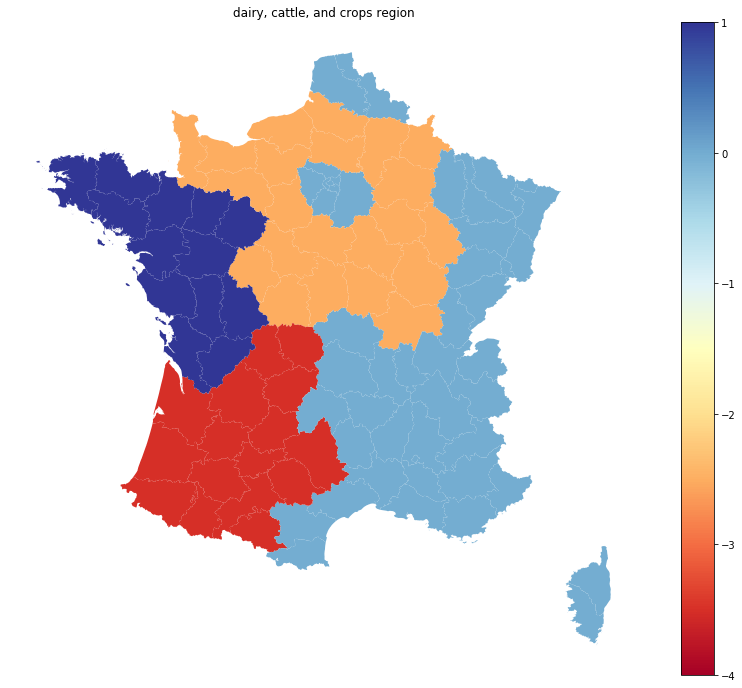

In [174]:
p=France_mainland.plot(column='any_selected_region', figsize=(15,12), legend=True,cmap='RdYlBu',vmin=-4)
p.axis('off')
p.set_title('dairy, cattle, and crops region')
